# Final Project - Employee Satisfaction Survey Data


# Group 38
___

### Members:

* Ariel Zehavi
* Eitan Fisher
* Ariel Nissim


<div>
<img src="https://i.postimg.cc/SK28fmn3/healthy-lunch.png?raw=true" width="700"/> 
</div>

#### The data analyses employees of a company, checking how satisfied they are among other details about them. Our goal is to understand how we can make the company better and support best our employees. We want to give the company managers our recommendations.

<br>Data source is from [kaggle](https://www.kaggle.com/datasets/redpen12/employees-satisfaction-analysis), which was taken from an online survey of an office.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/arieln14/project-b/main/Employee%20Attrition.csv'
survey = pd.read_csv(url)
survey

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,support,low
14995,14996,0.37,0.48,2,160,3,0,0,support,low
14996,14997,0.37,0.53,2,143,3,0,0,support,low
14997,14998,0.11,0.96,6,280,4,0,0,support,low


#### We will check if there are empty values in our data

In [3]:
survey.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

#### We took the four main columns and presented the distribution of the data.

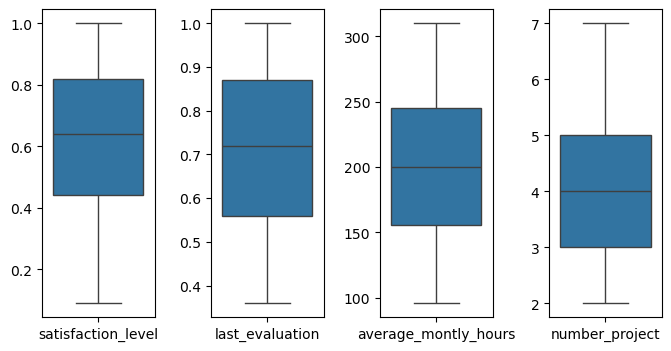

In [4]:
fig, ax = plt.subplots (figsize=(8, 4),  ncols=4)
plt.subplots_adjust(wspace = 0.5)
sns.boxplot(data = survey[['satisfaction_level']], ax = ax[0])
sns.boxplot(data = survey[['last_evaluation']], ax = ax[1])
sns.boxplot(data = survey[['average_montly_hours']], ax = ax[2])
sns.boxplot(data = survey[['number_project']], ax = ax[3])
plt.show()

## 1.Retention of quality employees
---

#### First of all we will check the averages of the satisfacion and the last evaluation within the company employees. Then we will focus on the top emplyees who are less satisfied.

In [5]:
survey[['satisfaction_level', 'last_evaluation']].mean()

satisfaction_level    0.612834
last_evaluation       0.716102
dtype: float64

In [6]:
best = survey[(survey['last_evaluation']>0.716)]
best

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
6,7,0.10,0.77,6,247,4,0,0,sales,low
7,8,0.92,0.85,5,259,5,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14986,14987,0.85,0.85,4,247,6,0,0,technical,low
14990,14991,0.89,0.88,5,228,5,1,0,support,low
14991,14992,0.09,0.81,6,257,4,0,0,support,low
14993,14994,0.76,0.83,6,293,6,0,0,support,low


In [7]:
low_satisfaction_level=best[best['satisfaction_level']<=0.61]
low_satisfaction_level.reset_index(drop=True)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,3,0.11,0.88,7,272,4,0,0,sales,medium
1,7,0.10,0.77,6,247,4,0,0,sales,low
2,12,0.11,0.81,6,305,4,0,0,sales,low
3,21,0.11,0.83,6,282,4,0,0,sales,low
4,23,0.09,0.95,6,304,4,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
2972,14973,0.11,0.97,6,310,4,0,0,accounting,medium
2973,14976,0.10,0.79,7,310,4,0,0,hr,medium
2974,14980,0.09,0.93,6,296,4,0,0,technical,medium
2975,14992,0.09,0.81,6,257,4,0,0,support,low


In [8]:
high_satisfaction_level=best[best['satisfaction_level']>0.61]
high_satisfaction_level.reset_index(drop=True)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2,0.80,0.86,5,262,6,0,0,sales,medium
1,4,0.72,0.87,5,223,5,0,0,sales,low
2,8,0.92,0.85,5,259,5,0,0,sales,low
3,9,0.89,1.00,5,224,5,0,0,sales,low
4,13,0.84,0.92,4,234,5,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
4624,14984,0.72,0.84,5,257,5,0,0,technical,medium
4625,14986,0.91,0.99,5,254,5,0,0,technical,medium
4626,14987,0.85,0.85,4,247,6,0,0,technical,low
4627,14991,0.89,0.88,5,228,5,1,0,support,low


In [9]:
avg_comparison = pd.concat([high_satisfaction_level[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']].mean(), low_satisfaction_level[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']].mean()], axis=1)
avg_comparison.columns = ['High Satisfaction Level', 'Low Satisfaction Level']
avg_comparison

,High Satisfaction Level,Low Satisfaction Level
satisfaction_level,0.807144,0.341330
last_evaluation,0.867976,0.858801
number_project,3.925038,4.605979
average_montly_hours,211.215165,224.424924
time_spend_company,3.590840,3.830702
Work_accident,0.151005,0.130668
promotion_last_5years,0.019875,0.020490


#### We see that the main differences are in the number of projects and in the monthly average hours, so we'll analyse these details.

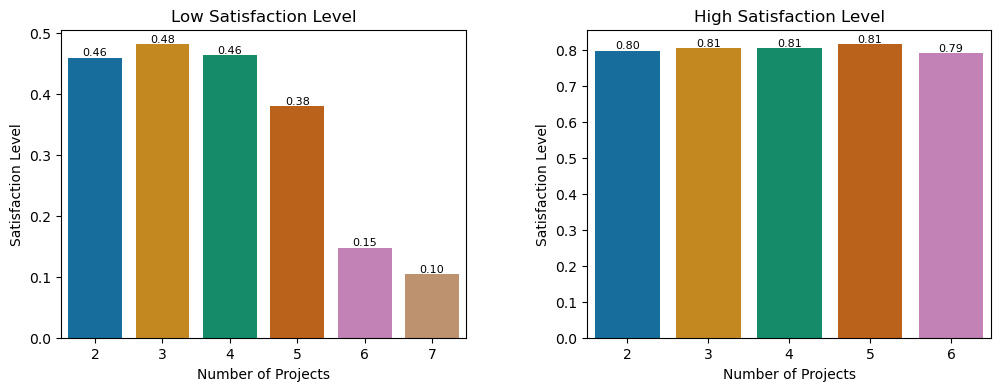

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plt.subplots_adjust(wspace=0.3)

sns.barplot(data=low_satisfaction_level, x="number_project", y='satisfaction_level', palette='colorblind', ci=None, ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, fontsize=8, fmt='%.2f')
ax[0].set_xlabel('Number of Projects')
ax[0].set_ylabel('Satisfaction Level')
ax[0].set_title('Low Satisfaction Level') 

sns.barplot(data=high_satisfaction_level, x="number_project", y='satisfaction_level', palette='colorblind', ci=None, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, fontsize=8, fmt='%.2f')
ax[1].set_xlabel('Number of Projects')
ax[1].set_ylabel('Satisfaction Level')
ax[1].set_title('High Satisfaction Level')

fig.suptitle('', fontsize=18)

plt.show()


#### When a emplyee is satisfied, the sixth project won't change much, however if the emplyee was less satisfied, taking a sixth project will change dramatically his satisfaction level.

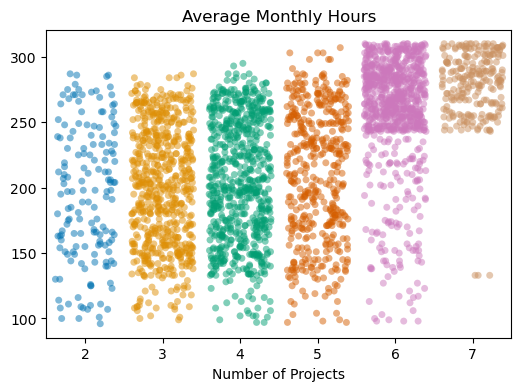

In [11]:
plt.figure(figsize=(6, 4))
ax=sns.stripplot(data=low_satisfaction_level, x='number_project', y='average_montly_hours', palette='colorblind', jitter=0.4, alpha=0.5)
plt.xlabel('Number of Projects')
plt.ylabel('')
plt.title('Average Monthly Hours')
plt.show()

#### Sixth project means more hours per month. Let's check the averages.

In [12]:
low_satisfaction_level.groupby('number_project')[['average_montly_hours']].mean()

,average_montly_hours
number_project,
2,195.064103
3,199.889764
4,204.870739
5,209.977925
6,259.100127
7,279.058333


### From these graphs we understand that among the less satisfied employees of the company, getting a sixth project, or working more than around 240 hours per month, frustrates the people to the point that they are very dissatisfied. We assume the when their satisfaction is so low, it won't be surprising if they will decide to quit their job. Therefore we recommend the managers that any employee who wants to take on six projects or regularly work more than 240 hours a month needs to get permission from his direct manager to make sure he doesn't break from the workload.




<div>
<img src="https://aharon-cpas.co.il/wp-content/uploads/2021/11/%D7%A9%D7%99%D7%9E%D7%95%D7%A8-%D7%A2%D7%95%D7%91%D7%93%D7%99%D7%9D.jpg" width="500"/> 
</div>

## 2.The analysis of the satisfaction of the veteran employees
___

#### We will analyze the employees who have been with the company for more than 4 years.

In [13]:
more_5_years=survey[survey['time_spend_company']>=5]
more_5_years


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
1,2,0.80,0.86,5,262,6,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
7,8,0.92,0.85,5,259,5,0,0,sales,low
8,9,0.89,1.00,5,224,5,0,0,sales,low
12,13,0.84,0.92,4,234,5,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14983,14984,0.72,0.84,5,257,5,0,0,technical,medium
14985,14986,0.91,0.99,5,254,5,0,0,technical,medium
14986,14987,0.85,0.85,4,247,6,0,0,technical,low
14990,14991,0.89,0.88,5,228,5,1,0,support,low


#### We took the three wards that clearly show the decline.

In [14]:
it_data = more_5_years[more_5_years['dept'] == 'IT']
product_mng_data = more_5_years[more_5_years['dept'] == 'product_mng']
marketing_data = more_5_years[more_5_years['dept'] == 'marketing']

# Concatenate the filtered dataframes into one dataframe
combined_data = pd.concat([it_data, product_mng_data, marketing_data])

# Reset index
combined_data.reset_index(drop=True, inplace=True)

combined_data.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,63,0.10,0.95,6,244,5,0,0,IT,medium
1,139,0.74,1.00,4,249,5,0,0,IT,low
2,140,0.73,0.87,5,257,5,0,0,IT,low
3,218,0.90,0.98,5,245,5,0,0,IT,low
4,224,0.87,0.90,5,252,5,0,0,IT,low


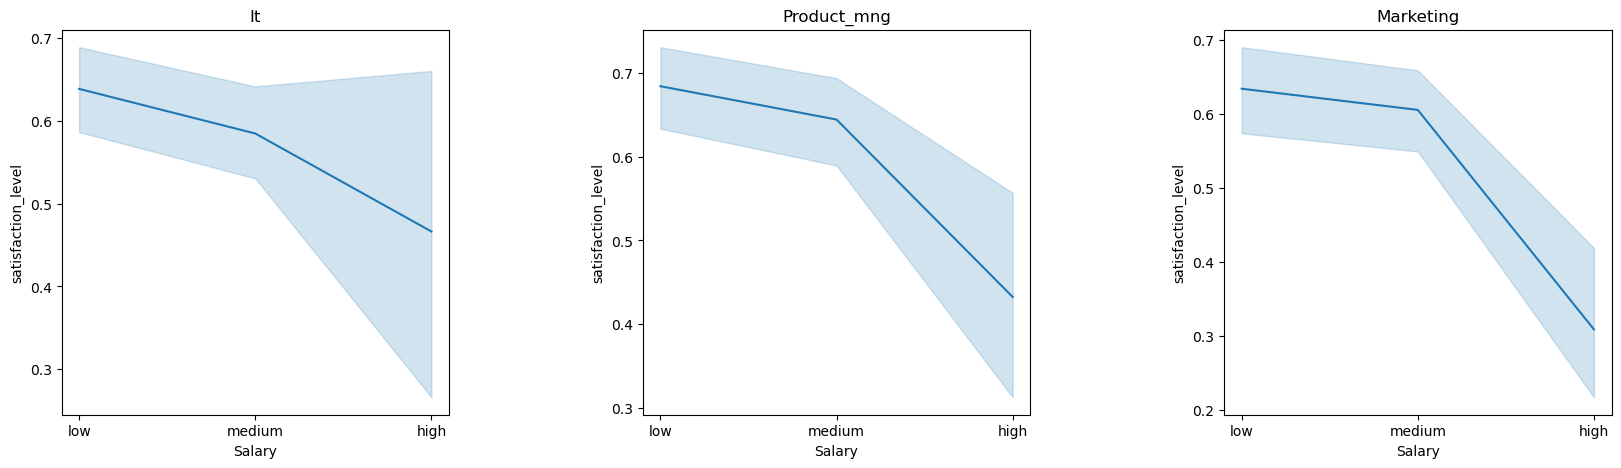

In [21]:
salary_categories = ['low', 'medium', 'high']
combined_data['salary'] = pd.Categorical(combined_data['salary'], categories=salary_categories, ordered=True)
department_dict = {}
for dept in combined_data['dept'].unique():
    department_dict[dept.lower().replace(' ', '_')] = combined_data[combined_data['dept'] == dept]

fig, axes = plt.subplots(1, len(department_dict), figsize=(20, 5))
plt.subplots_adjust(wspace=0.5)

for i, (dept_name, dept_df) in enumerate(department_dict.items()):
    # Plot lineplot for each department
    sns.lineplot(data=dept_df, x='salary', y='satisfaction_level', hue='dept', ax=axes[i], legend=False)
    axes[i].set_title(dept_name.capitalize())
    axes[i].set_xlabel('Salary')

plt.xticks(ticks=range(len(salary_categories)), labels=salary_categories)

plt.show()

#### We analyzed the salary groups by selected columns.

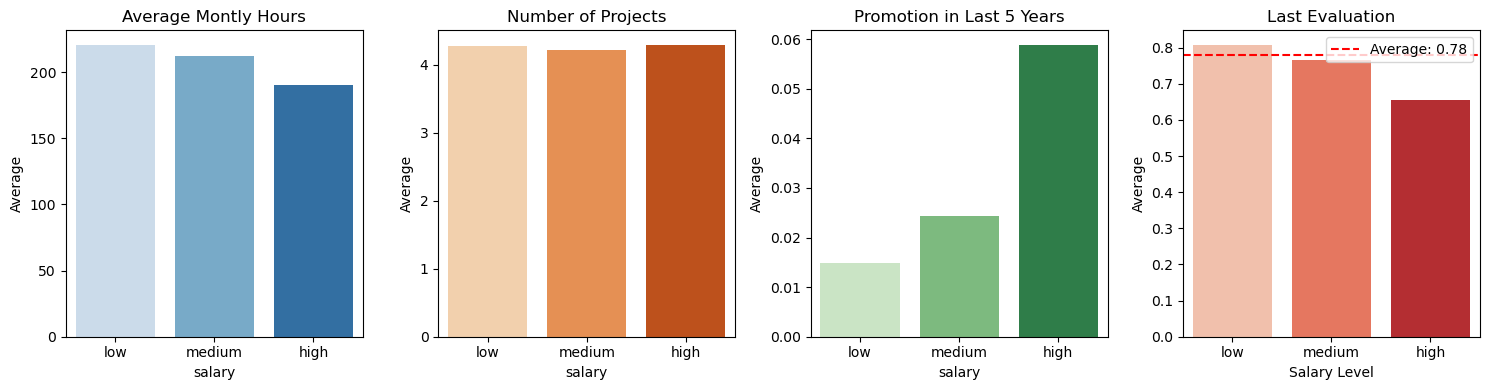

In [16]:
average_values = combined_data.groupby('salary').agg({
    'average_montly_hours': 'mean',
    'number_project': 'mean',
    'promotion_last_5years': 'mean',
    'last_evaluation': 'mean'
}).reset_index()

fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharex=True)

sns.barplot(data=average_values, x='salary', y='average_montly_hours', ax=axes[0], palette='Blues')
axes[0].set_title('Average Montly Hours')
axes[0].set_ylabel('Average')

sns.barplot(data=average_values, x='salary', y='number_project', ax=axes[1], palette='Oranges')
axes[1].set_title('Number of Projects')
axes[1].set_ylabel('Average')

sns.barplot(data=average_values, x='salary', y='promotion_last_5years', ax=axes[2], palette='Greens')
axes[2].set_title('Promotion in Last 5 Years')
axes[2].set_ylabel('Average')

sns.barplot(data=average_values, x='salary', y='last_evaluation', ax=axes[3], palette='Reds')
axes[3].set_title('Last Evaluation')
axes[3].set_ylabel('Average')
axes[3].set_xlabel('Salary Level')

average_value = combined_data['last_evaluation'].mean()
plt.axhline(y=average_value, color='red', linestyle='--', label=f'Average: {average_value:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

#### We have added another column that can explain why the average of the last evaluation of high-earning employees is low.

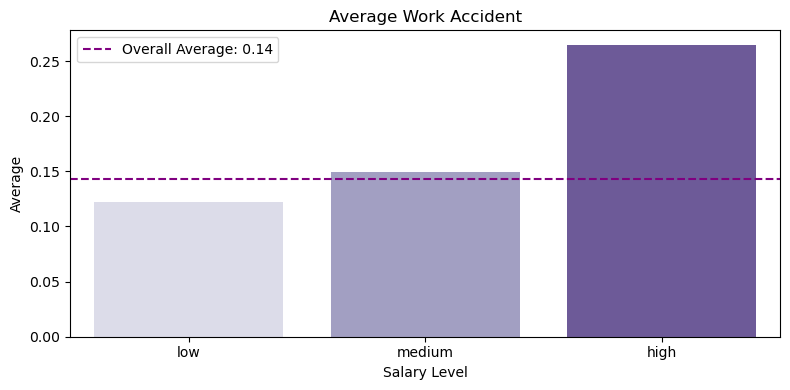

In [17]:
average_work_accident = combined_data.groupby('salary')['Work_accident'].mean().reset_index()

fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(data=average_work_accident, x='salary', y='Work_accident', palette='Purples')
ax.set_title('Average Work Accident')
ax.set_ylabel('Average')

average_value_work_accident = combined_data['Work_accident'].mean()
ax.axhline(y=average_value_work_accident, color='purple', linestyle='--', label=f'Overall Average: {average_value_work_accident:.2f}')
ax.legend()

plt.xlabel('Salary Level')
plt.tight_layout()
plt.show()


#### We would think that the higher the salary, the higher the level of employee satisfaction. And we discovered that what affects the level of satisfaction of the veterans is not the high salary but the company's appreciation of them, and we believe that the level of appreciation for them is damaged because of a high percentage of their work accidents.
#### Therefore, our conclusion for the company is that it is worthwhile to take care of work accidents and thus the employees will be more satisfied

<div>
<img src="https://www.ynet.co.il/PicServer4/2014/10/27/5658797/477329201000100640360no.jpg" width="400"/> 
</div>

# 3. Mosr challenging years in the company
___

We want to check whether there is a difference in the employees satisfcation according to seniority their in the company.

In [22]:
newdf=survey.groupby('time_spend_company')[['satisfaction_level']].mean()
rows_to_color = [2]
color = "red"
newdf.style.applymap(lambda _: f"background-color: {color}",
                  subset=(newdf.index[rows_to_color],))

,satisfaction_level
time_spend_company,
2,0.697078
3,0.626314
4,0.467517
5,0.610305
6,0.603440
7,0.635957
8,0.665062
10,0.655327


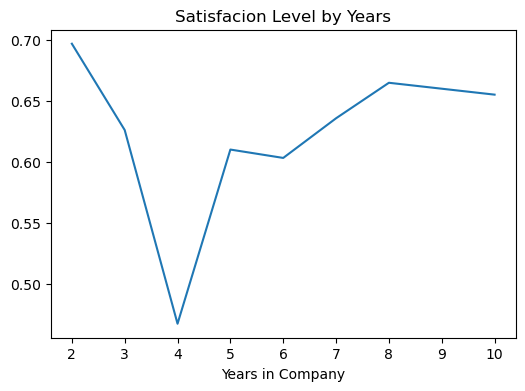

In [23]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=survey, x='time_spend_company', y='satisfaction_level', ci=None)
plt.xlabel('Years in Company')
plt.ylabel('')
plt.title('Satisfacion Level by Years')
plt.show()

Looks like the 4th year brings a crisis. let's try understanding the reason.

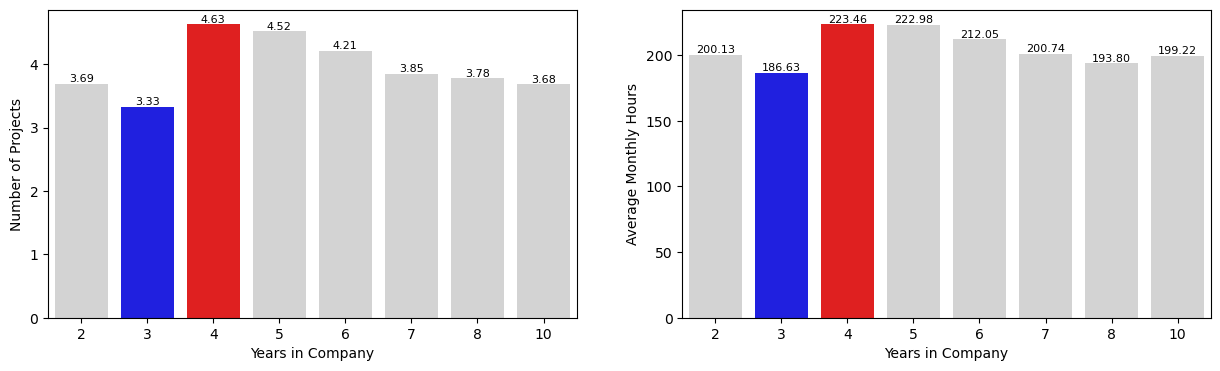

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

palette = ['lightgray' for _ in 'time_spend_company']

time_spend_company=['2','3','4','5','6','7','8','10']
palette[time_spend_company.index('3')] = 'blue'
palette[time_spend_company.index('4')] = 'red'


sns.barplot(data=survey, x='time_spend_company', y='number_project', ci=None, ax=ax[0],legend=False, palette=palette)
sns.barplot(data=survey, x='time_spend_company', y='average_montly_hours', ci=None, ax=ax[1],legend=False, palette=palette)
for container in ax[0].containers:
    ax[0].bar_label(container, fontsize=8, fmt='%.2f')
for container in ax[1].containers:
    ax[1].bar_label(container, fontsize=8, fmt='%.2f')
ax[0].set_xlabel('Years in Company')
ax[0].set_ylabel('Number of Projects')
ax[1].set_xlabel('Years in Company')
ax[1].set_ylabel('Average Monthly Hours')
plt.show()

The fourth year comes with a significant increase in the number of hours and the number of projects. We see that in the fifth year the amount of work does not decrease, yet the employees are again more satisfied. From this it can be understood that the difficulty is temporary and therefore we would advise the company's managers to invest time and resources in strengthening the employees entering the fourth year so that they enter the challenge with vigor and do not break from it.